In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [25]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:>

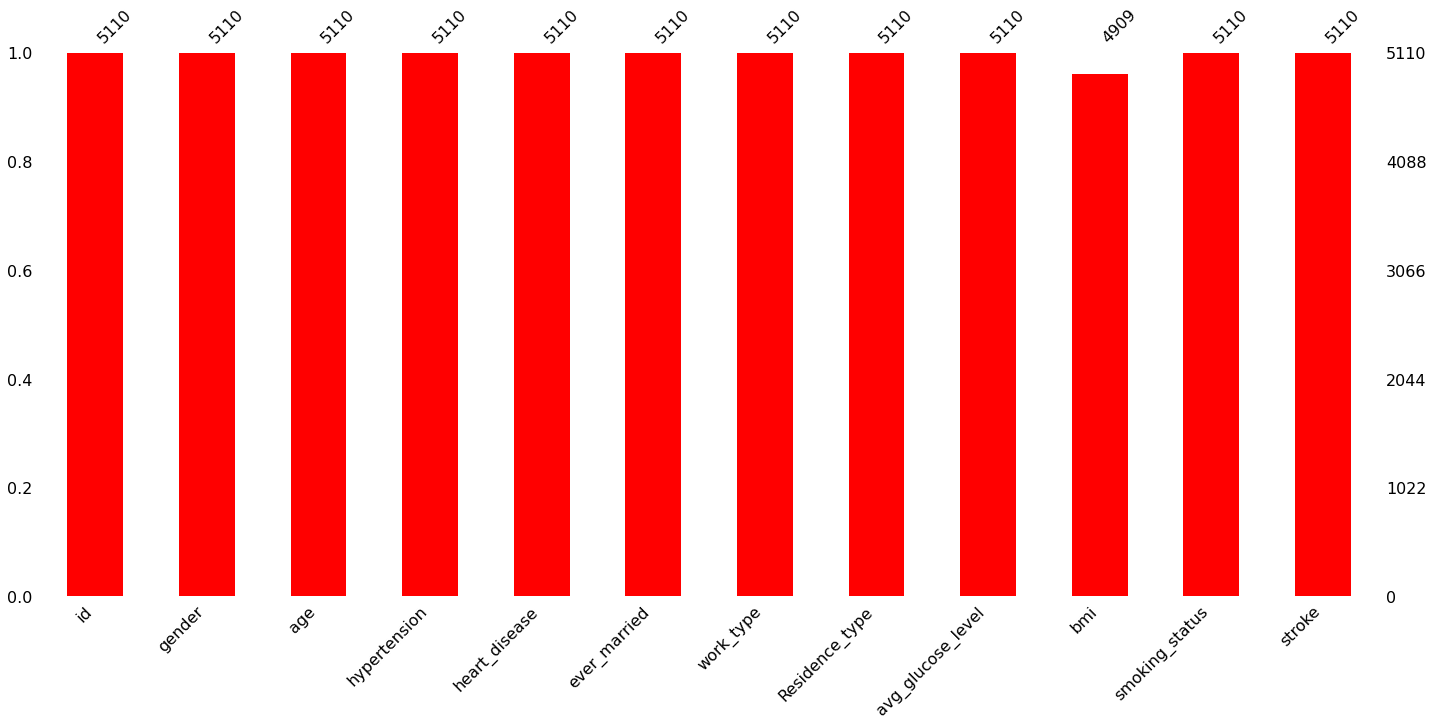

In [26]:
mns.bar(df,color = 'red')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
df.shape

(5110, 12)

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(4909, 12)

In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
cat_veriable = ['gender','ever_married',
       'work_type', 'Residence_type','smoking_status']
enc =LabelEncoder()
for col in cat_veriable:
    df[col] = enc.fit_transform(df[col])

In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [34]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [36]:
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
pred1 = model1.predict(X_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1170
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.91      0.95      0.93      1228



AxesSubplot(0.125,0.125;0.62x0.755)


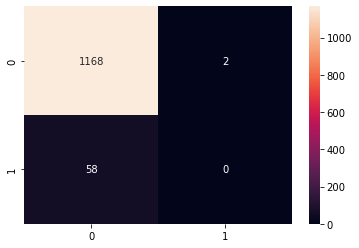

In [39]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True,fmt='0.5g'))

In [40]:
MPLMODEL = MLPClassifier(solver = 'adam',hidden_layer_sizes=(100,),activation='logistic')
MPLMODEL.fit(X_train,y_train)

MLPClassifier(activation='logistic')

In [41]:
mlppred = MPLMODEL.predict(X_test)
mlppred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

c:\Users\Ishaq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ishaq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ishaq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1170
           1       0.00      0.00      0.00        58

    accuracy                           0.95      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.91      0.95      0.93      1228

AxesSubplot(0.125,0.125;0.62x0.755)


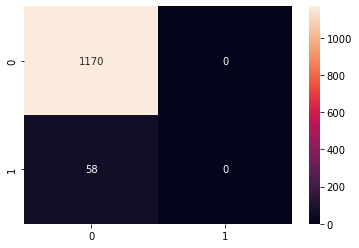

In [42]:
print(classification_report(y_test,mlppred))
print(sns.heatmap(confusion_matrix(y_test,mlppred),annot =True,fmt='0.5g'))